## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

## And so on and so forth...

In [2]:
import os

print("Path at terminal when executing this file")
print(os.getcwd() + "\n")


Path at terminal when executing this file
/home/eightun/Downloads/Udacity/Self_Driving_Car/Core_Adv_CV/L8_Advanced_CV/Project_AdvancedLaneFinding/HC_Project/CarND-Advanced-Lane-Lines-master/examples




#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  



# Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in the first code cell of the IPython notebook located in "./examples/example.ipynb" (or in lines # through # of the file called `some_file.py`).  

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.  

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained this result: 

![alt text][image1]



### Pipeline (single images)

#### 1. Provide an example of a distortion-corrected image.

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
![alt text][image2]

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.

I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines # through # in `another_file.py`).  Here's an example of my output for this step.  (note: this is not actually from one of the test images)

![alt text][image3]

#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `warper()`, which appears in lines 1 through 8 in the file `example.py` (output_images/examples/example.py) (or, for example, in the 3rd code cell of the IPython notebook).  The `warper()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```python
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
```

This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

![alt text][image4]


In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
%matplotlib qt



# Prepare object point
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y

# Arrays to store object points and image points from all the images
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # adding x, y coordinates at firt two columns

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Read in and make a list of calibration images # Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    # read in each image
    img = cv2.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None) # Gray scale and ny by nx corners dimenstions of chess board and flag for None

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret) # Draw chess corner on image
#         print(len(objpoints))
        ## Begin Distortion:
        # Begin calibrate camera:
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        
        # undistort images with given mtx, dist at the image
        undistorted = cv2.undistort(img, mtx, dist, None, mtx)
        
        
        ## Begin warper
        img_size = gray.shape[::-1]# (gray.shape[1], gray.shape[0])
        offset = 100 # offset for dst pts

        # Perspective transform:
        # Four source coordinates:
        #tl, tr, bl, br
        src = np.float32([corners[0], corners[nx-1], corners[-nx], corners[-1]])

        # Four desired coordinates:
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [offset, img_size[1]-offset],
                                     [img_size[0]-offset, img_size[1]-offset]])

        # Compute the perspective transform, M
        M = cv2.getPerspectiveTransform(src, dst)
        
        # Create wapred image - uses linear interpolation
        warped_img = cv2.warpPerspective(img, M, img_size)

        # Draw and display the corners
        cv2.imshow('img',warped_img)
#             plt.imshow(warped_img)
#             plt.imsave(warped_img)
        cv2.waitKey(500)



        # Save image
        folderName = '../HC_camera_cal_output/'
        isFile = os.path.exists(folderName)
        if isFile:
            plt.imsave(os.path.join(folderName+fname[17::]), warped_img)
#                 plt.savefig(os.path.join(folderName+fname[17::]))
            # cv2.imread(os.path.join(folderName+fname[17::]),int(img))
            # plt.imsave('image_new.jpg',image )
        else:
            os.makedirs(folderName)
            plt.imsave(os.path.join(folderName+fname[17::]), warped_img)
#                 plt.savefig(os.path.join(folderName+fname[17::]))
#             cv2.imread(os.path.join(folderName+fname[17::]),int(img))

    
cv2.destroyAllWindows()


## Writeup Template

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.            <    <    <            << << << << <<--------------------------------------------------------------------------------------------------------------------------
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./examples/undistort_output.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"




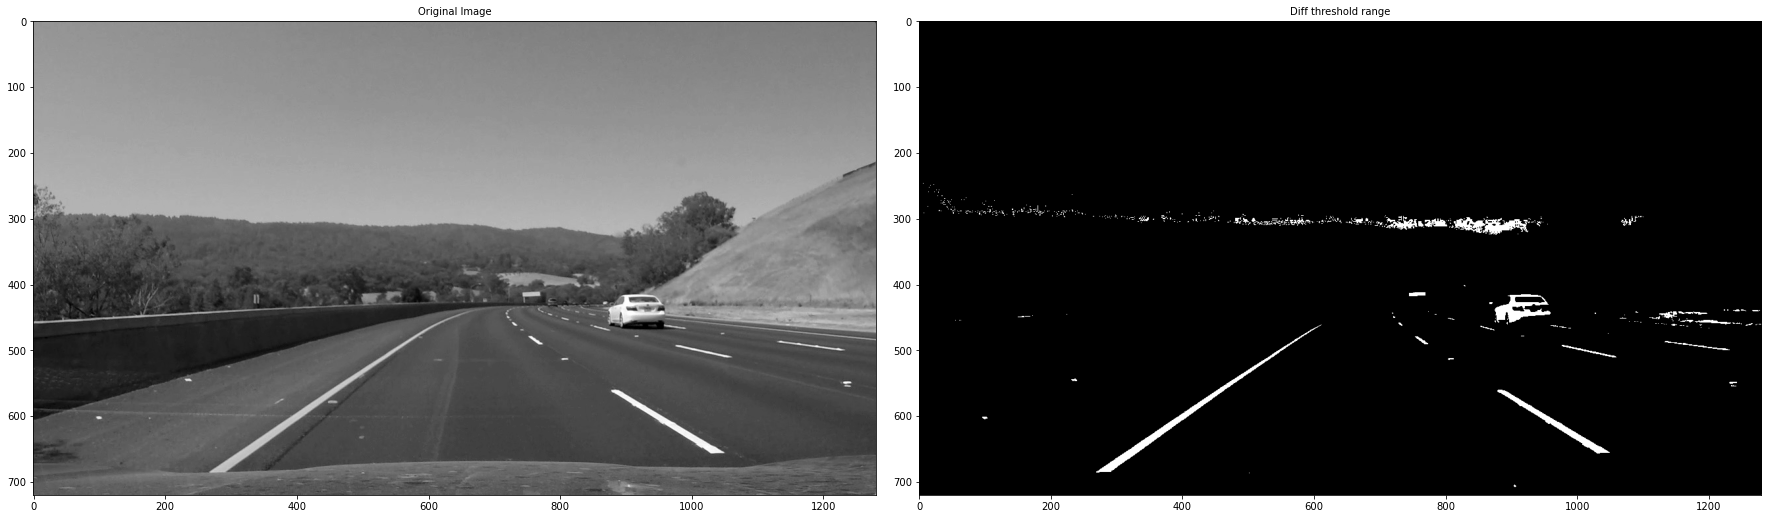

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# %matplotlib qt
%matplotlib inline


fileName = '../test_images/test3.jpg'
image = mpimg.imread(fileName)
thresh = (180, 255) #(min, max)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

# Run 
dir_binary = binary
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(gray, cmap='gray')
ax1.set_title('Original Image', fontsize=10)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Diff threshold range', fontsize = 10)
plt.subplots_adjust(left =0., right=1., top = 0.9, bottom=0.)


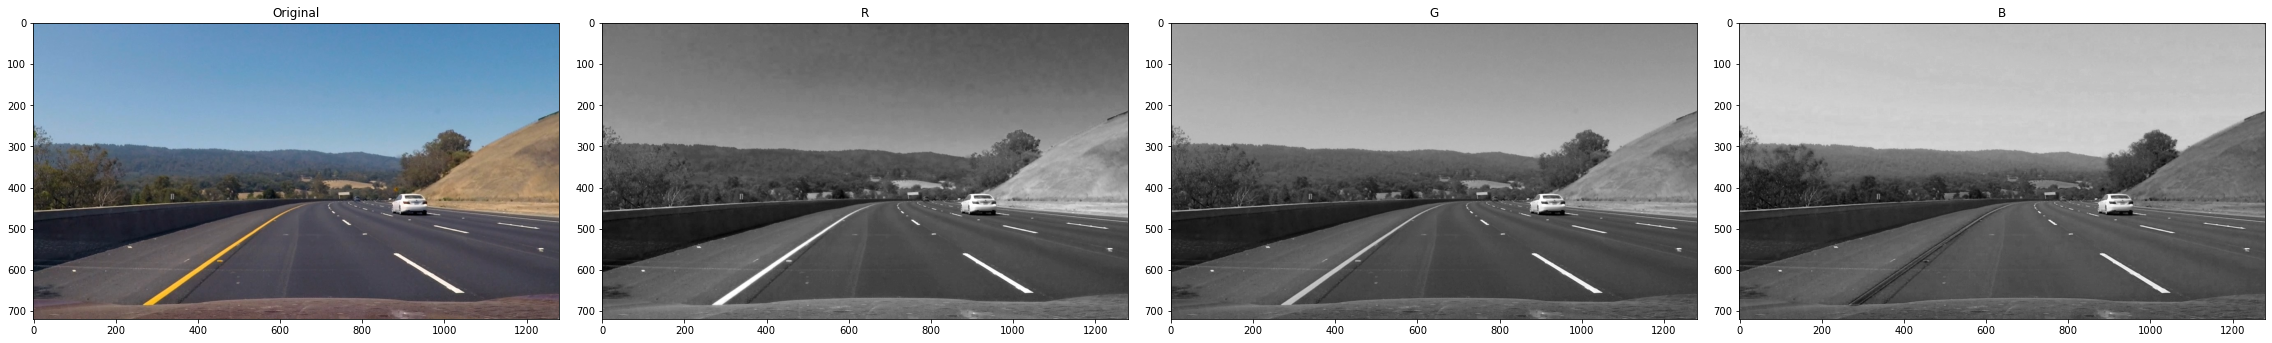

In [2]:
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(31, 11))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(R, cmap='gray')
ax2.set_title('R')
ax3.imshow(G, cmap='gray')
ax3.set_title('G')
ax4.imshow(B, cmap='gray')
ax4.set_title('B')
plt.subplots_adjust(left = 0., right =1, top =0.9, bottom = 0.)

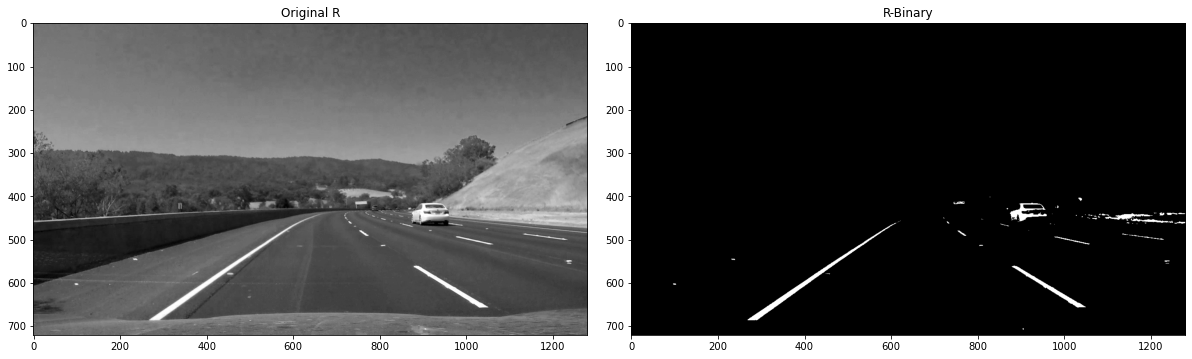

In [3]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R<= thresh[1])] = 1
# a1 = binary

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('Original R')
ax2.imshow(binary, cmap='gray')
ax2.set_title('R-Binary')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


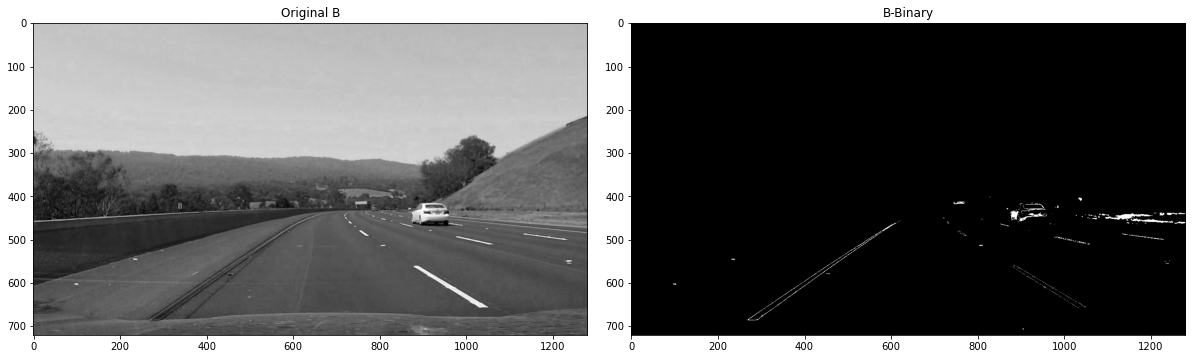

In [4]:
thresh = (200, 240)
binary = np.zeros_like(B)
binary[(R > thresh[0]) & (R<= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.tight_layout()
ax1.imshow(B, cmap='gray')
ax1.set_title('Original B')
ax2.imshow(binary, cmap='gray')
ax2.set_title('B-Binary')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


problem at R binary when running fileName = '../test_images/test4.jpg'
-appeared lots of unnecessary part added

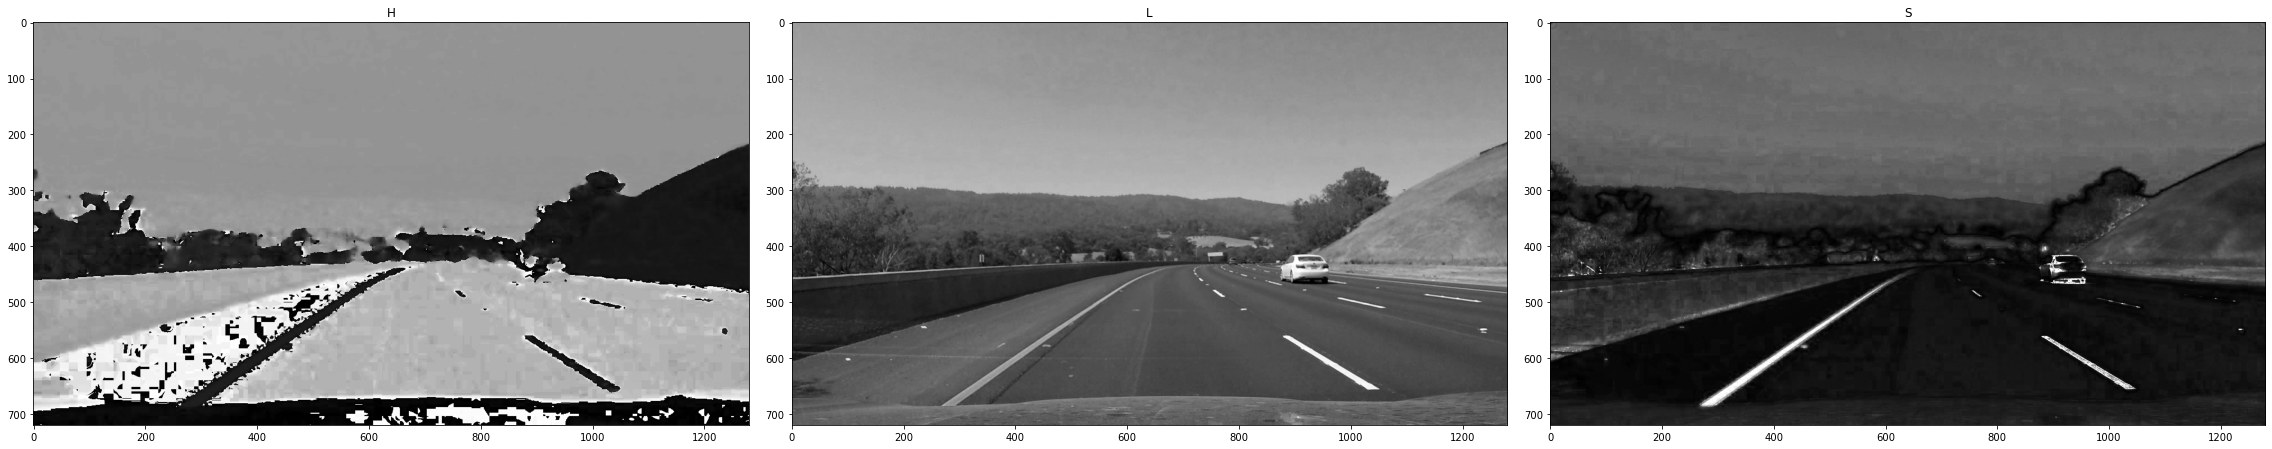

In [5]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(31,11))
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('H')
ax2.imshow(L, cmap='gray')
ax2.set_title('L')
ax3.imshow(S, cmap='gray')
ax3.set_title('S')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

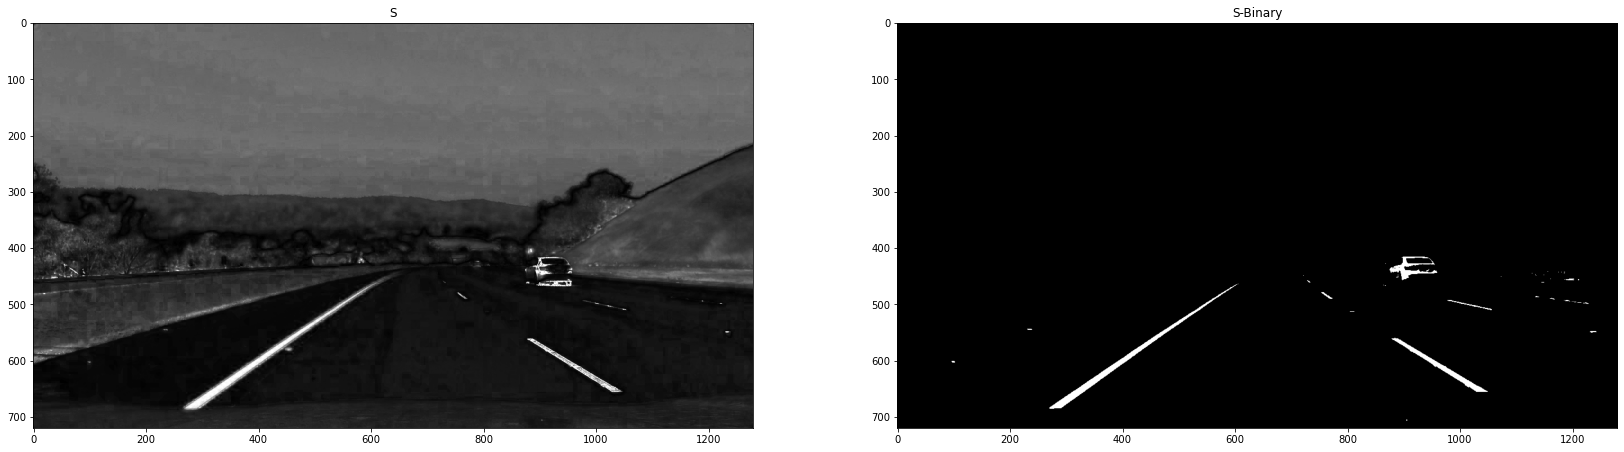

In [6]:
thresh = (218, 255)
binary = np.zeros_like(S)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
a2 = binary

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11))
f.tight_layout
ax1.imshow(S, cmap='gray')
ax1.set_title('S')
ax2.imshow(binary, cmap='gray')
ax2.set_title('S-Binary')
plt.subplots_adjust(left = 0., right =1, top=0.9, bottom =0.)

S shows good line

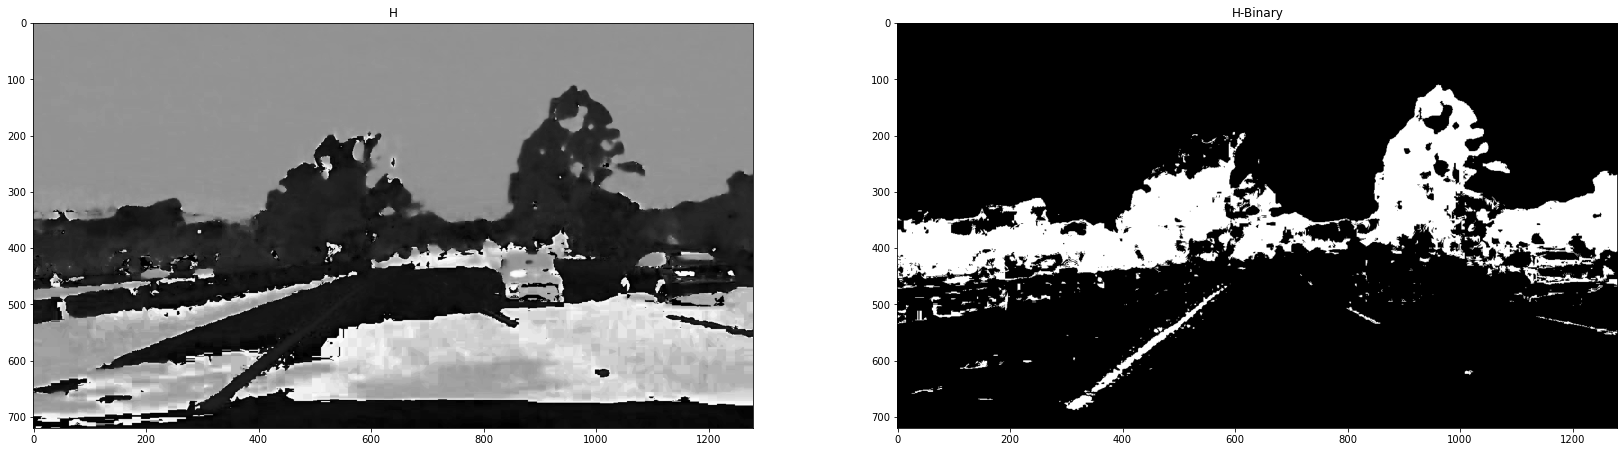

In [36]:
thresh = (18, 40)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1
a3 = binary

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11))
f.tight_layout
ax1.imshow(H, cmap='gray')
ax1.set_title('H')
ax2.imshow(binary, cmap='gray')
ax2.set_title('H-Binary')
plt.subplots_adjust(left = 0., right =1, top=0.9, bottom =0.)

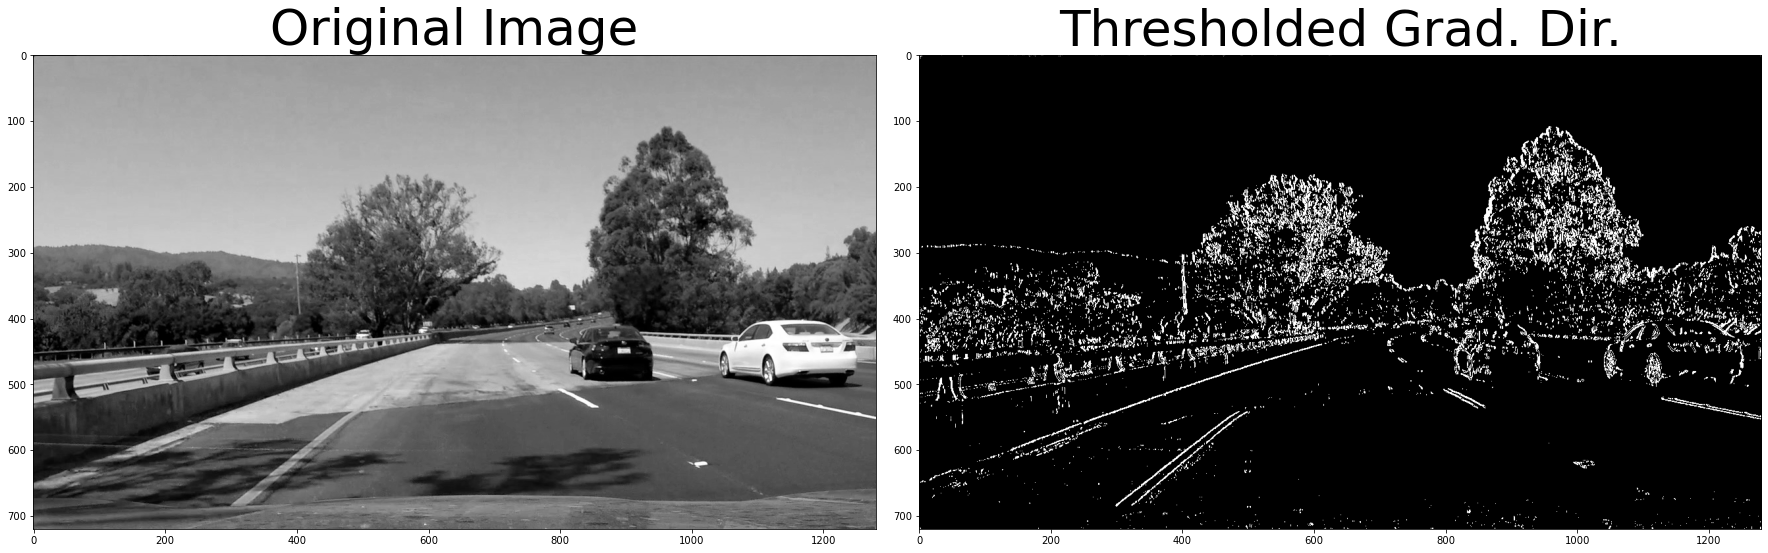

In [37]:

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.sqrt(np.square(sobelx))
    abs_sobely = np.sqrt(np.square(sobely))
    abs_sobelxy = np.sqrt(np.square(sobelx)+np.square(sobely))
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    theta = np.arctan2(abs_sobely, abs_sobelx)
    
#     normalize
#     theta = np.uint8(theta/(np.max(theta)/255))

    scaled_theta = np.uint8(theta/np.max(theta/255))

    # 5) Create a binary mask where direction thresholds are met
#     binary_output = np.zeros_like(theta)
    binary_output = np.zeros_like(scaled_theta)
    binary_output[(theta >= thresh[0]) & (theta <= thresh[1])] = 1

    
    # 6) Return this mask as your binary_output image
#     binary_output = np.copy(img) # Remove this line

    return binary_output


def abs_sobel_thresh(gray, orient='x', sobel_kernel=3, thresh=(0, 255)):
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray =img
    # Calculate directional gradient
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.sqrt(np.square(sobelx))
    abs_sobely = np.sqrt(np.square(sobely))
    abs_sobelxy = np.sqrt(np.square(sobelx)+np.square(sobely))
    
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    
    # Apply threshold
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    

    return sxbinary


# Run the function
sx_L = abs_sobel_thresh(L, orient='x', sobel_kernel=3, thresh=(20, 100))
a1 = sx_L
# dir_binary = dir_threshold(binary, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(L, cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(sx_L, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)




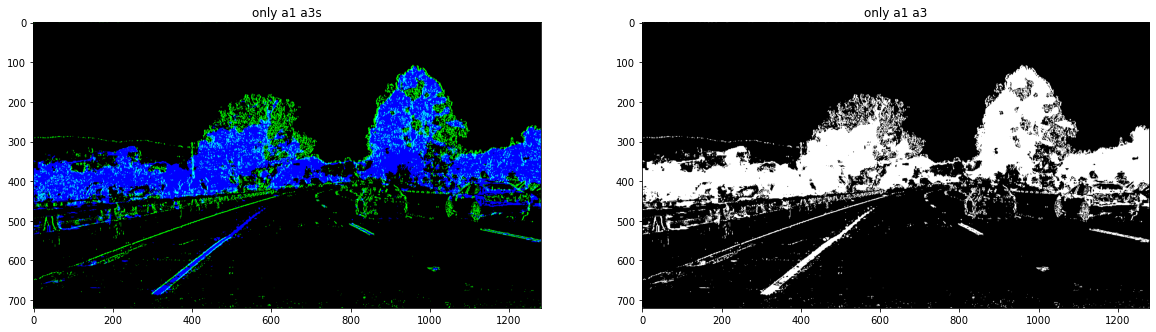

In [38]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(a1), a1, a3)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(a1)
combined_binary[(a1 == 1) | (a3 == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('only a1 a3s')
ax1.imshow(color_binary)

ax2.set_title('only a1 a3')
ax2.imshow(combined_binary, cmap = 'gray')

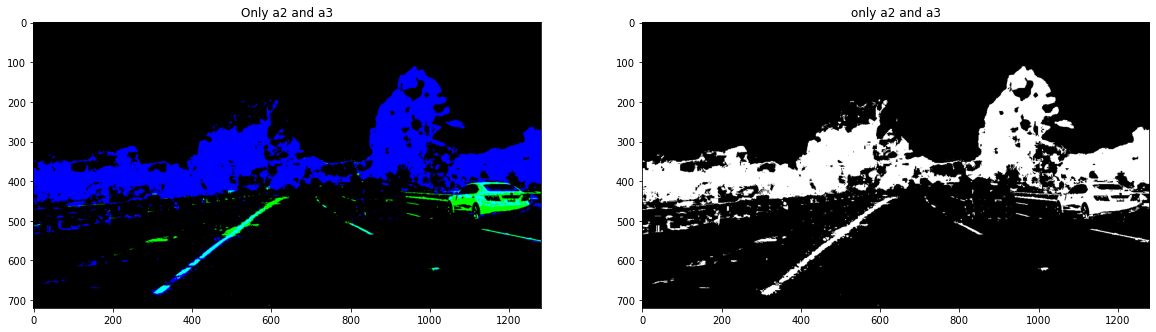

In [39]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(a2), a2, a3)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(a1)
combined_binary[(a2 == 1) | (a3 == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Only a2 and a3')
ax1.imshow(color_binary)

ax2.set_title('only a2 and a3')
ax2.imshow(combined_binary, cmap='gray')

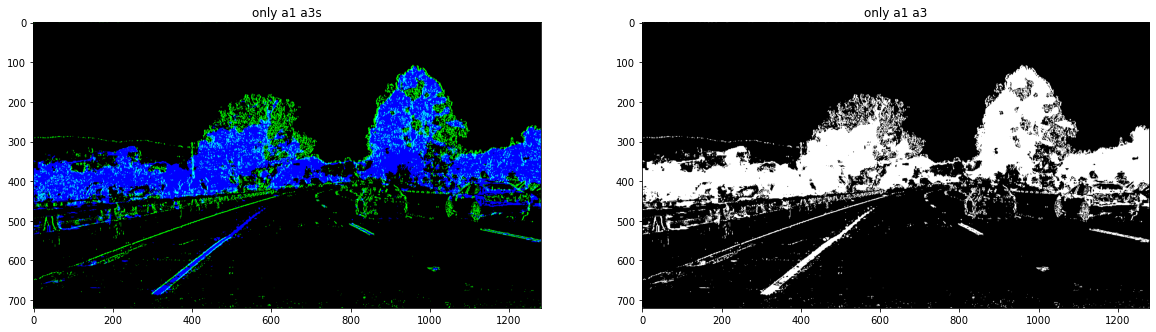

In [40]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(a1), a1, a3)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(a3)
combined_binary[(a1 == 1) | (a3 == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('only a1 a3s')
ax1.imshow(color_binary)

ax2.set_title('only a1 a3')
ax2.imshow(combined_binary, cmap = 'gray')

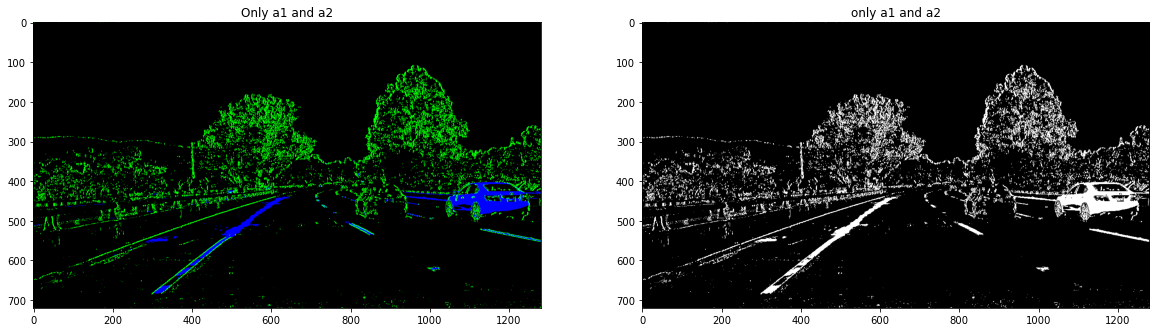

In [41]:
# %matplotlib qt

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(a1), a1, a2)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(a1)
combined_binary[(a2 == 1) | (a1 == 1)] = 1



best_binary1 = combined_binary


# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Only a1 and a2')
ax1.imshow(color_binary)

ax2.set_title('only a1 and a2')
ax2.imshow(combined_binary, cmap='gray')

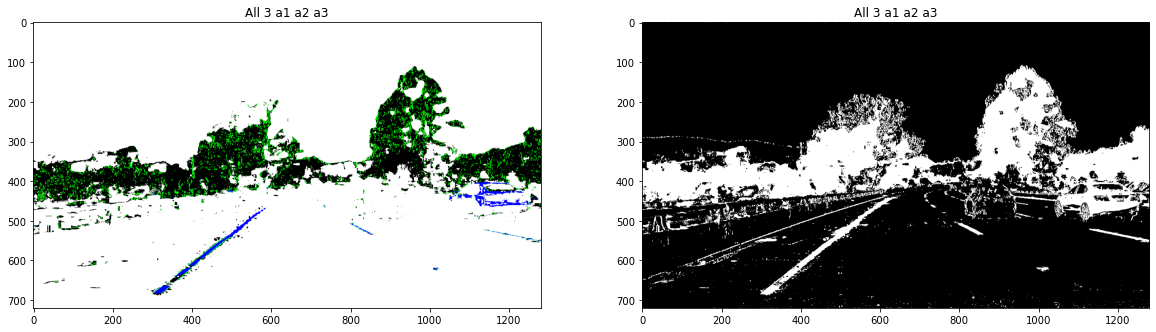

In [42]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(a1), a1, a2, a3)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(a1)
combined_binary[(a1 == 1) | (a2 == 1) | (a3 == 1)] = 1




# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('All 3 a1 a2 a3')
ax1.imshow(color_binary)

ax2.set_title('All 3 a1 a2 a3')
ax2.imshow(combined_binary, cmap='gray')


Now Warp image with best binary


In [43]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray =img
    # Calculate directional gradient
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.sqrt(np.square(sobelx))
    abs_sobely = np.sqrt(np.square(sobely))
    abs_sobelxy = np.sqrt(np.square(sobelx)+np.square(sobely))
    
    if orient == 'x':
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    else:
        scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
    
    
    # Apply threshold
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    

    return grad_binary



# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary



def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray = img
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.sqrt(np.square(sobelx))
    abs_sobely = np.sqrt(np.square(sobely))
    abs_sobelxy = np.sqrt(np.square(sobelx)+np.square(sobely))
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    theta = np.arctan2(abs_sobely, abs_sobelx)
    
#     normalize
#     theta = np.uint8(theta/(np.max(theta)/255))

    scaled_theta = np.uint8(theta/np.max(theta/255))

    # 5) Create a binary mask where direction thresholds are met
#     binary_output = np.zeros_like(theta)
    dir_binary = np.zeros_like(scaled_theta)
    dir_binary[(theta >= thresh[0]) & (theta <= thresh[1])] = 1
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(14, 130))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(44, 115))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(np.pi/5, np.pi/3))

In [44]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

best_binary2 = combined

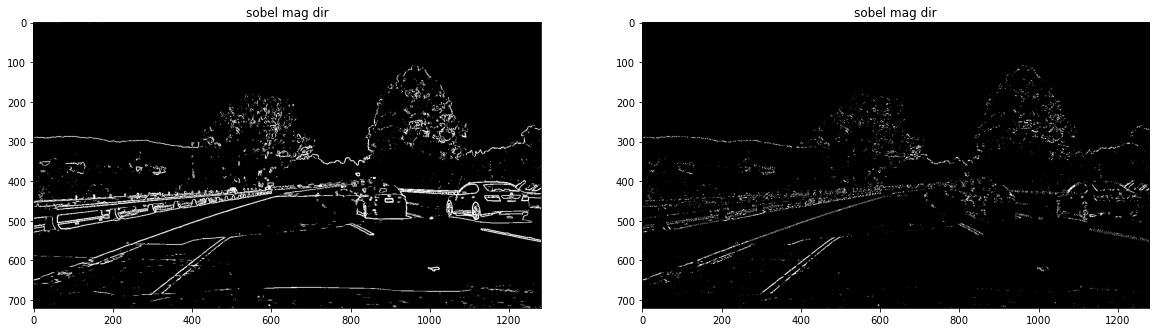

In [45]:
# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('sobel mag dir')
ax1.imshow(mag_binary, cmap ='gray')

ax2.set_title('sobel mag dir')
ax2.imshow(combined, cmap='gray')


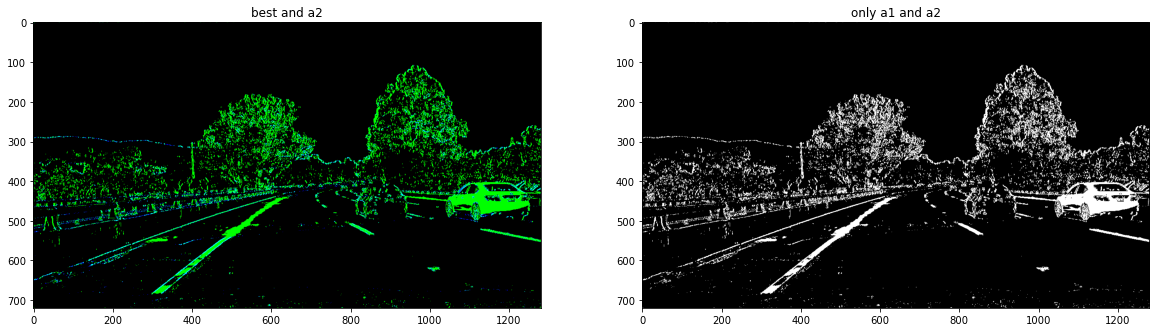

In [46]:
# %matplotlib qt

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(best_binary1), best_binary1, best_binary2)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(best_binary1)
combined_binary[(best_binary2 == 1) | (best_binary1 == 1)] = 1



# best_binary1 = combined_binary
best_final = combined_binary

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('best and a2')
ax1.imshow(color_binary)

ax2.set_title('only a1 and a2')
ax2.imshow(combined_binary, cmap='gray')

# Begin warping

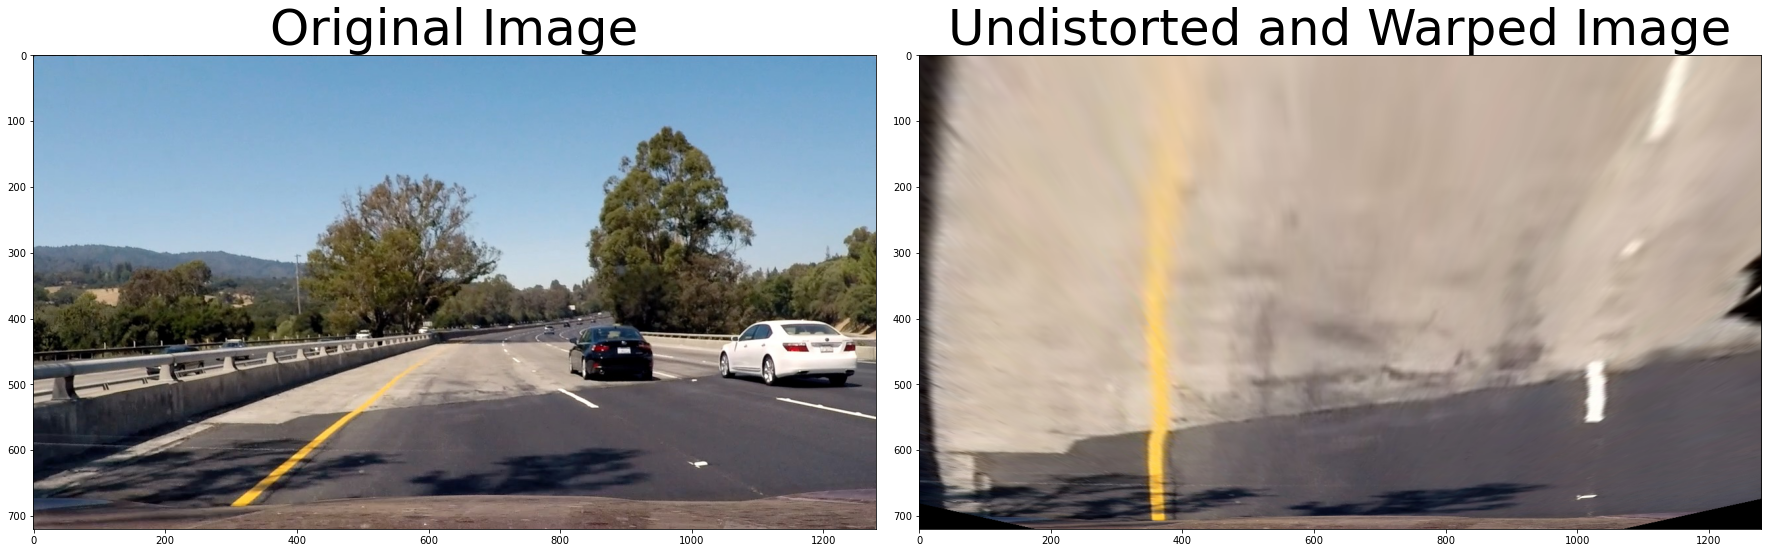

In [47]:
img_size = (image.shape[1], image.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
trythis = warped.copy()
trythis2 = image.copy()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

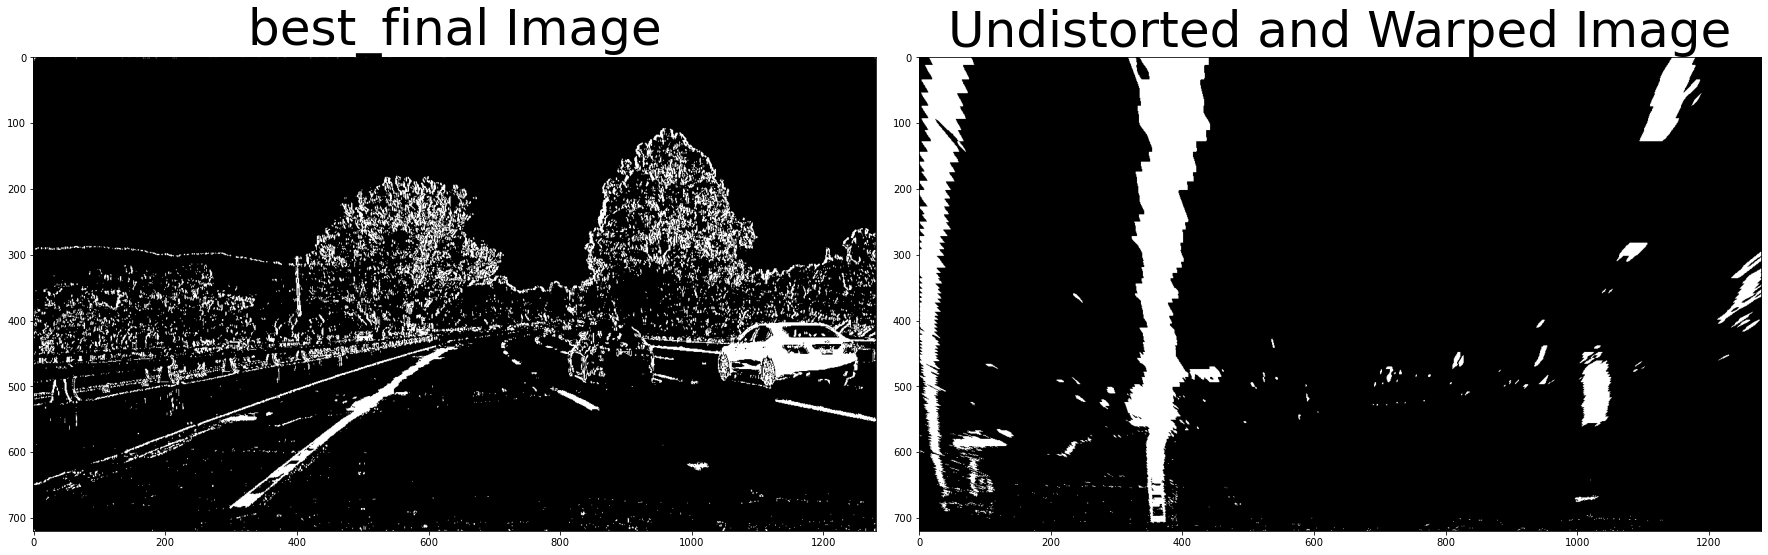

In [48]:
img_size = (image.shape[1], image.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(best_final, M, img_size, flags=cv2.INTER_LINEAR)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(best_final, cmap='gray')
ax1.set_title('best_final Image', fontsize=50)
ax2.imshow(warped, cmap ='gray')
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Locate the Lane Lines
Line Finding Method: Peaks in a Histogram

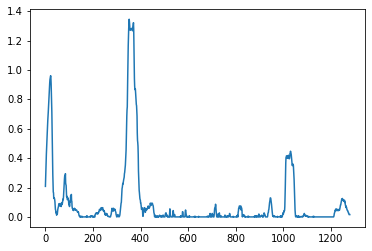

In [49]:
def hist(image):
    bottom_half = img[img.shape[0]//2:,:]
    histogram = np.sum(bottom_half, axis=0)
    return histogram

img = warped/255
histogram = hist(img)
plt.plot(histogram)



# Implement Sliding Windows and Fit a Polynomial
## Split the histogram for the two lines left and right x base


In [50]:
# # histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
# # # Create an output image to draw on and visualize the result
# # out_img = np.dstack((binary_warped, binary_warped, binary_warped))
# # # Find the peak of the left and right halves of the histogram
# # # These will be the starting point for the left and right lines
# midpoint = np.int(histogram.shape[0]//2)
# leftx_base = np.argmax(histogram[:midpoint])
# rightx_base = np.argmax(histogram[midpoint:]) + midpoint



# binary_warped = warped
# # Create an output image to draw on and visualize the result
# out_img = np.dstack((binary_warped, binary_warped, binary_warped))
# # HYPERPARAMETERS
# # Choose the number of sliding windows
# nwindows = 9
# # Set the width of the windows +/- margin
# margin = 100
# # Set minimum number of pixels found to recenter window
# minpix = 50

# # Set height of windows - based on nwindows above and image shape
# window_height = np.int(binary_warped.shape[0]//nwindows)
# # Identify the x and y positions of all nonzero pixels in the image
# nonzero = binary_warped.nonzero()
# nonzeroy = np.array(nonzero[0])
# nonzerox = np.array(nonzero[1])
# # Current positions to be updated later for each window in nwindows
# leftx_current = leftx_base
# rightx_current = rightx_base

# # Create empty lists to receive left and right lane pixel indices
# left_lane_inds = []
# right_lane_inds = []


In [51]:
# binary_warped = warped
# # Create an output image to draw on and visualize the result
# out_img = np.dstack((binary_warped, binary_warped, binary_warped))
# # Divide into two parts
# # These will be the starting point for the left and right lines
# midpoint = np.int(histogram.shape[0]//2)
# leftx_base = np.argmax(histogram[:midpoint])
# rightx_base = np.argmax(histogram[midpoint:]) + midpoint
# # print(midpoint, leftx_base, rightx_base)

# # Set up windows nd window hyperparameters


In [52]:
# # Hyperparameters
# # Choose the number of slinding windows
# nwindows = 9

# # Set the width of the windows +/- margin
# margin = 100

# # Set minimumnumber of pixels found to recenter window
# minpix =50

# # Set height of windows - based on nwindows abouve and image shape
# window_height = np.int(binary_warped.shape[0]//nwindows)

# # Identify the x and y positions of all nonzero(i,e. activated) pixels in the image
# nonzero = binary_warped.nonzero()
# # print(type(nonzero))
# # print(nonzero)
# # <class 'tuple'>
# # (array([  0,   0,   0, ..., 719, 719, 719]), array([ 341,  342,  343, ...,  720, 1005, 1006]))

# nonzeroy = np.array(nonzero[0])
# nonzerox = np.array(nonzero[1])

# # Current positions to be updated later for each window in windows
# leftx_current = leftx_base
# rightx_current = rightx_base

# # Create empty lists to receive left and right lane pixel indices
# left_lane_inds = []
# right_lane_inds = []




In [53]:
# # Iterate through nwindows to track culvature
# # 1. Loop through each windows in nwindows
# # 2. Find the boundaries of our current windows. (leftx_current and rightx_current) as well as the margin you set in the hyperparameters
# # 3. Use cv2.rectangle to draw these windows boundares onto our visualization image out_img. 
# # 4. Now that we know the boundaries of our window. find out which activated pixels from nonzeroy, and nonzerox above actually fall into the window.
# # 5. Append these to our lists left_lane_inds and right_lanes_inds.
# # 6. If the number of pixels you found in step 4 are geater than you hyperparameter minpix, re-center our window(i.e. leftx_current or rightx_current) based on the mean position of these pixels
# for window in range(nwindows):
#     # Identify window boundaries in x and y (and right and left)
#     win_y_low = binary_warped.shape[0] - (window + 1)*window_height
#     win_y_high = binary_warped.shape[0] - (window)*window_height
#     win_xleft_low =leftx_current - margin
#     win_xleft_high = leftx_current + margin
#     win_xright_low = rightx_current - margin
#     win_xright_high = rightx_current + margin
    
#     # Draw the windows on the visualization mage
#     cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0,255,0), 2)
#     cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (0,255,0), 2)   
    
#     # Identify the nonzero pixels in x and y within the window #
#     good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
#     good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    
#     # Append these indicies to the lists
#     left_lane_inds.append(good_left_inds)
#     right_lane_inds.append(good_right_inds)
    
#     # If you found > minpix pixels, recenter next window on their mean position
#     if len(good_left_inds) > minpix:
#         leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
#     if len(good_right_inds) > minpix:
#         rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        
        
#     # Concatenate the arrays of indicies (previously was a list of lists of pixels)
#     try:
#         left_lane_inds = np.concatenate(left_lane_inds)
#         right_lane_inds = np.concatenate(right_lane_inds)
#     except ValueError:
#         pass
    
#     # Extract left and right line pixel positions
#     leftx = nonzerox[left_lane_inds]
#     lefty = nonzeroy[left_lane_inds]
#     rightx = nonzerox[right_lane_inds]
#     righty = nonzeroy[right_lane_inds]
    
    
    

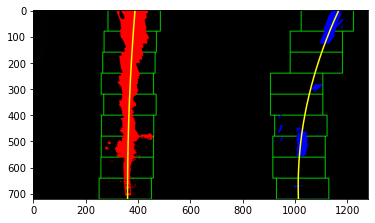

In [54]:

# Iterate through nwindows to track culvature
# 1. Loop through each windows in nwindows
# 2. Find the boundaries of our current windows. (leftx_current and rightx_current) as well as the margin you set in the hyperparameters
# 3. Use cv2.rectangle to draw these windows boundares onto our visualization image out_img. 
# 4. Now that we know the boundaries of our window. find out which activated pixels from nonzeroy, and nonzerox above actually fall into the window.
# 5. Append these to our lists left_lane_inds and right_lanes_inds.
# 6. If the number of pixels you found in step 4 are geater than you hyperparameter minpix, re-center our window(i.e. leftx_current or rightx_current) based on the mean position of these pixels

# Load our image
binary_warped = warped.copy()

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
# 
    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img, ploty, left_fit, right_fit


out_img, ploty,left_fit, right_fit = fit_polynomial(binary_warped)

plt.imshow(out_img)

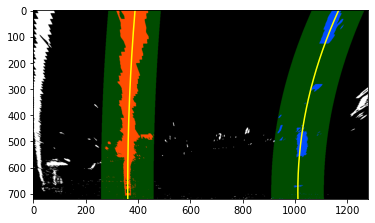

In [55]:

def fit_poly(img_shape, leftx, lefty, rightx, righty):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result, left_fitx, right_fitx, ploty, out_img

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result, left_fitx, right_fitx, ploty, out_img = search_around_poly(binary_warped)

# View your output
plt.imshow(result)

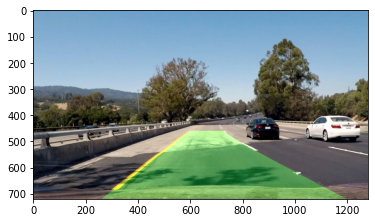

In [56]:
warped = binary_warped
image = binary_warped
# print(type(warped))
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

img_size = (warped.shape[1], warped.shape[0])


src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

Minv = cv2.getPerspectiveTransform(dst, src)

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0]))





# Warp the blank back to original image space using inverse perspective matrix (Minv)
result = cv2.warpPerspective(trythis2, Minv, (image.shape[1], image.shape[0])) 




# Combine the result with the original image
result = cv2.addWeighted(trythis2, 1, newwarp, 0.3, 0)
plt.imshow(result)

(720, 1280, 3)
(720, 1280)
(720, 1280, 3)
(720, 1280, 3)


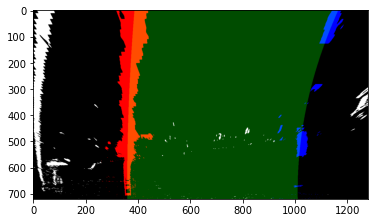

In [57]:
a = binary_warped
print(color_warp.shape)
print(a.shape)
# a = color_warp[:,:,0]
test = np.zeros_like(color_warp)

test[:,:,1] = a

print(test.shape)
print(color_warp.shape)
result = cv2.addWeighted(out_img, 1, color_warp, 0.3, 0)
plt.imshow(result, cmap='gray')